# STA 208: Homework 3 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


1) exponential loss is convex: $\frac{\partial^2 \phi}{\partial x^2} = e^{-x} \gt 0 $

2) truncated quadratic loss is convex: `1-x` is convex, `0` is convex, `f = max(1-x, 0)` is convex; `g = x^2` is convex, `g(f(x))` is convex

3) hinge loss is convex: `1-x` is convex, `0` is convex, `max(1-x, 0)` is convex.

4) sigmoid loss is not convex: tanh(x) is not convex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

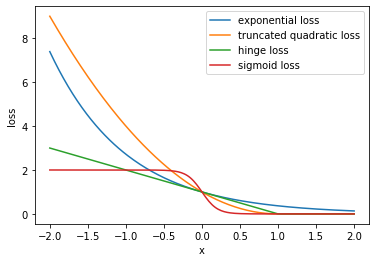

In [2]:
lin = np.linspace(-2, 2, 200)
kappa = 5
plt.plot(lin, np.exp(-lin), label = 'exponential loss')
plt.plot(lin, [max(x)**2 for x in zip(1-lin, np.zeros_like(lin))], 
         label = 'truncated quadratic loss')
plt.plot(lin, [max(x) for x in zip(1-lin, np.zeros_like(lin))],
         label = 'hinge loss')
plt.plot(lin, 1-np.tanh(lin * kappa), label = 'sigmoid loss')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('loss')

__Exercise 2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top \beta)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. In quasi-Newton methods a matrix ($Q$) that is a surrogate for the Hessian of the objective $L$ is used to determine step direction.

$$
\beta \gets \beta - Q^{-1} \nabla L(\beta)
$$


Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda I.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization, comment on the computational complexity of this method.

2.1 

$R_n = \frac{1}{n}\sum_{i=1}^{n} (1-y_i x_i^\top \beta)^2_{+}$

$\nabla R_n = \frac{1}{n}\sum_{i=1}^{n} \nabla(1-y_i x_i^\top \beta)^2_{+}$

\begin{equation}
\label{eq6}
\nabla (1-y_ix_i^\top \beta)_{+}^2 = \left\{
\begin{aligned}
& -2(1-y_i x_i^\top \beta) y_i x_i,& if\ y_i x_i^\top \beta \le 1  \\  
& 0,&  if\ y_i x_i^\top \beta > 1 
\end{aligned}
\right.
\end{equation}  

The gradient always exists.

2.2

\begin{equation}
\label{eq6}
\frac{\partial \nabla l}{\partial \beta_j} = \left\{
\begin{aligned}
&{- 2(1-y_ix_{ij})y_ix_i}, &{if\ y_i x_i^\top \beta < 1} \\
&{0}, &{ if\ y_i x_i^\top \beta > 1} 
\end{aligned}
\right.
\end{equation}  

not continuous if $y_ix_{ij} \neq 1$

2.3 

$\min_{\beta} \frac{1}{n}\sum_{i=1}^n (1-y_ix_i^\top \beta)_{+}^2 + \lambda \sum_{j=1}^p \beta_j^2$


$\nabla R_n = \frac{1}{n}\sum_{i=1}^n \nabla (1-y_ix_i^\top \beta)_{+}^2 + 2\lambda \beta$ 

2.4

$G(\beta) = \frac{2}{n} X_s^\top X_s + 2\lambda I$, 

where $X_s =(x_{s_1}, ...x_{s_t})$, i.e. samples that are **misclassified**

Since for $\forall a$, $a^\top X_s^\top X_s a = (X_s a)^\top (X_s a) = \|X_s a\|^2 \ge 0$

we have $a^\top G(\beta) a = \frac{2}{n} \|X_s a\|^2 + 2\lambda \|a\|^2 >0$

then $G(\beta)$ is positive definite.

```
initialize beta_

for j in 1: max_iter: 
    
    G = 0
    L = 0
    for i in 1:n:
       if x_i is misclassified:
           G += 2 * (x_i^T * X_i)
           L += -2(1-y_i x_i^T \beta_) y_i x_i
    G /= n
    L /= n
    G += 2 * lambda * I
    L += 2 * lambda * beta_ + L
    
    beta_ -= inverse(G) * L
```

The computational complexity is O(max_iter * np) 

**Exercise 3 (20 pts)**

Consider the simulation below.

1. Implement minibatch stochastic gradient descent with the truncated quadratic loss using just numpy and base python.  Access the data by iteratively calling the ``sim_data`` method below.  

2. With minibatch size of $1$ (SGD).  Vary the learning schedule to be constant, decaying with $\eta_t \propto t^{-1/2}$, and $\eta_t \propto t^{-1}$.  Compare these schedules using normal noise (the ``noise_dis`` parm).

3. Vary the minibatch size to see the change in performance, with the best learning schedule from 2. When you compare two methods, make sure that you compare them with the same amount of data accessed (so use 1:10 ratio of iterations if you are comparing a minibatch ratio of 10:1).

4. Redo 2, 3 with ``noise_dis`` set to ``"chisquare"``.

In [3]:
import numpy as np

In [7]:
class DataSimulator:
    """
    Simulate the data for linear classification
    """
    def __init__(self,p,noise_dist = "normal"):
        self.beta = np.random.normal(0,1,p)
        self.noise_dist = noise_dist
        self.p = p
        
    def sim_data(self,m = 1):
        p = self.p
        X = np.random.normal(0,1,(m,p))
        if self.noise_dist == "normal":
            eps = np.random.normal(0,1,m)
        if self.noise_dist == "chisquare":
            eps = np.random.chisquare(1,m)
        z = X @ self.beta + eps
        y = 2*(z > 0)-1
        return X, y

In [144]:
np.random.seed(12)
ds = DataSimulator(10)
ds.sim_data(m=10)

(array([[-0.59782292,  0.47245699,  1.09595612, -1.2151688 ,  1.34235637,
         -0.12214979,  1.01251548, -0.91386915, -1.02953021,  1.20979645],
        [ 0.5018723 ,  0.13884618,  0.64076111,  0.52733267, -1.15436024,
         -2.21333348, -1.68175651, -1.78809425, -2.21853495, -0.64743078],
        [-0.52840432, -0.03920917,  0.21497595, -0.3843588 , -0.25390408,
          0.07325207, -0.99720384, -0.71385629,  0.03541635, -0.67794537],
        [-0.57188106, -0.10586232,  1.33583134,  0.31866529, -0.33759525,
         -0.58526828, -0.11491994,  2.24181779, -3.14741652,  0.53513589],
        [ 0.23249044,  0.86761195, -1.14821271,  2.11434424,  1.00094276,
         -0.051415  ,  0.1597877 , -0.71626359,  0.05052283, -0.14333741],
        [ 0.94357539,  0.35764423, -0.0834492 ,  0.6778061 ,  0.55606037,
          0.22271946, -1.52898548,  1.02921118, -1.16625876, -1.00956165],
        [-0.10526799,  0.51202216,  1.40772776, -1.68769633,  1.47123399,
          1.63646291, -0.4613949

3.1

In [263]:
def grad_descent(ds,T,m,beta_start,C,gamma):
    """
    ds: data simulator
    T: number of iterations
    m: minibatch size
    beta_start: init beta
    C, gamma : eta_t = C t^(-gamma)
    """
    betas = [beta_start]
    perf = []
    eta_t = C * (T ** (-gamma))
    for i in range(T):
        X_, y_ = ds.sim_data(m = m)
        pred_y = X_ @ betas[-1]
        #mis_ind = (pred_y * y_ < 1)
        #temp = X_[mis_ind,:].T @ (-2*(1-y_[mis_ind]*pred_y[mis_ind])*y_[mis_ind]) / m
        temp = np.zeros(ds.p)
        for j in range(m):
            if pred_y[j] * y_[j] < 1:
                temp += (-2 * (1-y_[j] * pred_y[j]) * y_[j] *  X_[j,:])
        temp /= m 
        betas.append(betas[-1] - eta_t * temp)
        perf.append(sum((betas[-1] - ds.beta)**2))
    return betas, perf

3.2

$\|\beta - \beta_{true}\|_2^2$ in each iteration is shown as below.

In [259]:
_ , loss1 = grad_descent(ds, T=20000, m=1,beta_start=np.ones(ds.p), C = 1, gamma = .5 )
_ , loss2 = grad_descent(ds, T=20000, m=1,beta_start=np.ones(ds.p), C = 1, gamma = 1 )

Text(0.5, 1.0, 'Distances between SGD betas and ture betas')

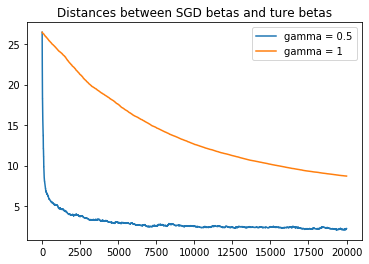

In [260]:
plt.plot(np.arange(len(loss1)), loss1, label = 'gamma = 0.5')
plt.plot(np.arange(len(loss2)), loss2, label = 'gamma = 1')
plt.legend()
plt.title("Distances between SGD betas and ture betas")

3.3

From 3.2, gamma is set to 0.5. Batch size is ranging from 1 to 500.

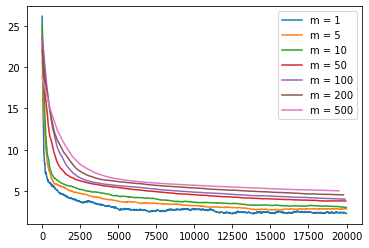

In [264]:
for i in [1, 5, 10, 50, 100, 200, 500]:
    _ , loss = grad_descent(ds, T=int(20000/(i)), m=i,beta_start=np.ones(ds.p), C = 1, gamma = 0.5 )
    plt.plot(np.arange(len(loss)) * i, loss, label = 'm = %d' % i)
plt.legend()
plt.show()

3.4

`noise_dis` is set to "chisquare".

In [188]:
np.random.seed(23)
ds2 = DataSimulator(10, noise_dist = "chisquare")

Text(0.5, 1.0, 'Distances between SGD betas and ture betas')

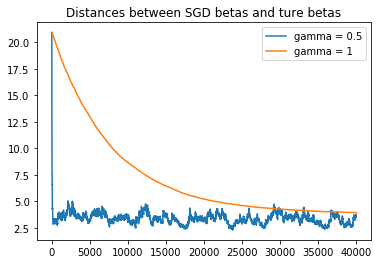

In [252]:
_ , loss1 = grad_descent(ds2, T=40000, m=1,beta_start=np.ones(ds.p), C = 2, gamma = .5 )
_ , loss2 = grad_descent(ds2, T=40000, m=1,beta_start=np.ones(ds.p), C = 2, gamma = 1 )
plt.plot(np.arange(len(loss1)), loss1, label = 'gamma = 0.5')
plt.plot(np.arange(len(loss2)), loss2, label = 'gamma = 1')
plt.legend()
plt.title("Distances between SGD betas and ture betas")

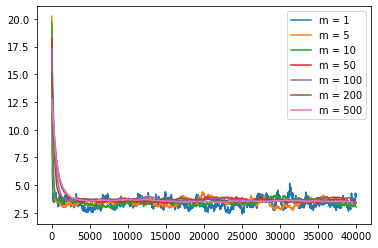

In [253]:
for i in [1, 5, 10, 50, 100, 200, 500]:
    _ , loss = grad_descent(ds2, T=int(40000/(i)), m=i,beta_start=np.ones(ds.p), C = 2, gamma = 0.5)
    plt.plot(np.arange(len(loss)) * i, loss, label = 'm = %d' % i)
plt.legend()
plt.show()

__Exercise 4.__ (50 pts) 

Text data can be converted into vector data through a vectorization operation.  A corpus is a collection of documents and the dictionary is all of the words in the corpus.  Bag-of-words models will treat each document as a set of words, ignoring the order of the words.  Then a simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document.  Two vectorizers are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``.

Below is an import of a reuters dataset.  I have written a def to process a single file.  Construct a response variable that has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct two sparse vectorized matrices---look at ``scipy.sparse``---based on the two above vectorizations.  Use sklearn svm.SVC on the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else); tune the kernel and C parameters.  Do the same for predicting 'acq' versus everything else.  Write a paragraph summarizing the performance and tuning.

In [2]:
from lxml import html, etree

In [3]:
reu = html.parse("reuters/reut2-000.sgm") #You will have to do this for all sgm files here

In [4]:
import nltk
#nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [6]:
reu_pl = parse_reu(reu)

In [7]:
print(reu_pl[0]['topics'])
" ".join(reu_pl[0]['body'])

['cocoa']


'experiencing light would march cumulative reluctant 5.93 4,351 review comissaria arrivals view per 15 june/july 45 july 4,415 commission earlier 1,780 drought destinations zone means 1,880 +bahia 2,400 estimated lower aug/sept sold bahia late week available weeks good new certificates going estimates delivered 4,345 currency hundred exporters tonne 27 period fit 1.06 york made march/april with 2.28 stage superior+ 995 sept there salvador thousand kilos 2,380 1.25 dificulties since farmers 4,450 bean booked 340 ports midday middlemen february standing ends although obtaining making processors 1,750 alleviating - held dec around levels bags export selling u.s. 22 reuter said much 1986/87 restored 753 4,480 currently may 1,850 final feb times dry 60 2.27 figures cocoa continued consignment 4,400 carnival mln 28 cruzados the registered 350 harvesting showers uruguay in liquor sales limited 26 last aug seems again buyers offer almost trade end named 2,375 crop expected argentina january ro

4.

There are 14668 training documents and 6188 testing documents. 

Since there are 19 documents that have topics 'earn' and 'acq' at the same time, I allocate these documents to the third category 'other' for simplicity. Then there are three categories in the response variable `y`: 'other', 'earn', and 'acq', represented by 3, 1, 2 separately. It can be seen that the data set is imbalanced. In this regard, `class_weight` in SVC is set to 'balanced'.

To apply multiclass as One-Vs-The-Rest, `label_binarize` is applied to the response variable, and `OneVsOneClassifier` is applied to `SVC`. 

To tune the parameters kernel and C, the training data set is first split into tuning part and validation part. Parameters that have the highest weighted f1-scores on validation part are chosen to train the final SVC classifier. The range of tuning C is set from 1 to 1000; and the tuning kernel function is selected among 'linear', 'poly','rbf', and 'sigmoid'. 

Finally, two classifiers are trained using the training sparse matrices returned by `CountVectorizer` and `TfidfVectorizer`. The ROC curves and PR curves for the testing data set are shown as below.

According to the tuning results, for the CountVectorizer matrix, the kernel function is set to 'rbf', C is set to 1; for the TfidfVectorizer matrix, the kernel function is set to 'linear'.  

Because the data set is imbalanced, both classifiers have high auc, and the PR curves might be more informative. For the classifier trained on the CountVectorizer matrix, the average precision for 'earn' is 0.75, and the average precision for 'acq' is 0.89. For the classifier trained on the TfidfVectorizer matrix, the average precision for 'earn' is 0.70, and the average precision for 'acq' is 0.90. 

It can be seen that the results of predicting 'acq' are better than predicting 'earn' using both vectorizers, this might be due to the internal data structure of the data set.


In [8]:
## read all the sgm files
topics = []
splits = []
body = []
for i in range(22):
    reu = html.parse('reuters/reut2-%03d.sgm' % i)
    reu_pl = parse_reu(reu)
    for j in range(len(reu_pl)):
        topics.append(reu_pl[j]['topics'])
        splits.append(reu_pl[j]['split'])
        body.append(" ".join(reu_pl[j]['body']))

In [9]:
splits_ = pd.Series(splits)
splits_.value_counts()

TRAIN       14668
TEST         6188
NOT-USED      722
dtype: int64

In [10]:
topics_ = pd.Series(topics)
body_ = pd.Series(body)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [12]:
count_vec = CountVectorizer()
tfidf_vec = TfidfVectorizer()

In [13]:
X_count_train = count_vec.fit_transform(body_[splits_ == 'TRAIN'])
X_tfidf_train = tfidf_vec.fit_transform(body_[splits_ == 'TRAIN'])

X_count_test = count_vec.transform(body_[splits_ == 'TEST'])
X_tfidf_test = tfidf_vec.transform(body_[splits_ == 'TEST'])

In [14]:
for i in topics_:
    if 'earn' in i and 'acq' in i:
        print(i)

['earn', 'acq']
['earn', 'acq']
['earn', 'acq']
['acq', 'earn']
['acq', 'earn']
['acq', 'earn']
['earn', 'acq']
['earn', 'acq']
['earn', 'acq']
['earn', 'acq']
['acq', 'earn']
['acq', 'earn']
['earn', 'acq']
['earn', 'acq']
['acq', 'earn']
['acq', 'earn']
['pet-chem', 'crude', 'acq', 'earn']
['acq', 'earn']
['acq', 'earn']


In [41]:
# response variable
y = []
for i in topics_:
    if 'earn' in i and 'acq' not in i:
        y.append(1)
    else:
        if 'acq' in i and 'earn' not in i:
            y.append(2)
        else:
            y.append(3)

In [42]:
y = pd.Series(y)
y.value_counts()

3    15181
1     3968
2     2429
dtype: int64

In [43]:
y = label_binarize(y, classes=[3, 1, 2])

In [69]:
def plot_curve(best_, X_test, y_, name):
    
    fpr={} 
    tpr={}
    precision={}
    recall={}
    
    pred_ = best_.decision_function(X_test)
    fpr[1], tpr[1], _ = roc_curve(y_[splits_ == 'TEST', 1], pred_[:,1])
    precision[1], recall[1], _ = precision_recall_curve(y_[splits_ == 'TEST', 1], pred_[:,1])
    
    fpr[2], tpr[2], _ = roc_curve(y_[splits_ == 'TEST', 2], pred_[:,2])
    precision[2], recall[2], _ = precision_recall_curve(y_[splits_ == 'TEST', 2], pred_[:,2])
    
    
    plt.plot(fpr[1], tpr[1], label='`earn` ROC curve (area = %0.2f)' % auc(fpr[1], tpr[1]))
    plt.plot(fpr[2], tpr[2], label='`acq` ROC curve (area = %0.2f)' % auc(fpr[2], tpr[2]))
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC curve for %s' % name)
    plt.show()
    
    plt.plot(recall[1], precision[1], label = '`earn` AP = %0.2f' % average_precision_score(y_[splits_ == 'TEST', 1], pred_[:,1]))
    plt.plot(recall[2], precision[2], label = '`acq` AP = %0.2f' % average_precision_score(y_[splits_ == 'TEST', 2], pred_[:,2]))
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend()
    plt.title('PR curve for %s' % name)
    plt.show()

In [71]:
def tune_svc(X_train, X_test, y_, name):
    """
    Tuning parameter kernel and C in SVC according to the f1-score of the validation data set. 
    Using the best kernel and best C to traing the SVC model on the whole traing data set, 
    then plot the ROC curve and precision-recall curve. 
    
    Args:
            X_train: The training data set.
            X_test:  The testing data set.
            y_:      The response variable.
            name:    Title for the plot.
    """
    
    # split the training data set into tuning part and validation part
    X_tune, X_valid, y_train, y_valid = train_test_split(X_train, y_[splits_ == 'TRAIN',:])
    
    kernels = ['linear', 'poly','rbf', 'sigmoid']
    Cs = np.logspace(0,4,3) 
    
    score = -100

    for kernel in kernels:
        for C in Cs:
            svc = OneVsRestClassifier(SVC(class_weight='balanced', C = C, kernel=kernel))
            svc.fit(X_tune, y_train)
            pred_y = svc.predict(X_valid)
            f1 = f1_score(y_valid, pred_y, average = 'weighted')
            if f1 > score:
                best_C = C
                best_kernel = kernel
                score = f1
    
    print(best_C, best_kernel)
                
    clf = OneVsRestClassifier(SVC(class_weight='balanced', C = best_C, kernel=best_kernel))
    clf.fit(X_train, y_[splits_ == 'TRAIN', :])
    plot_curve(clf, X_test, y_, name)

    #hyperpara = dict(C = C, kernel = kernels)
    #grid = GridSearchCV(svc, hyperpara, cv = 5)
    #best_ = grid.fit(X_train, y_[splits_ == 'TRAIN'])
    #svc.fit(X_train, y_[splits_ == 'TRAIN'])
    #return best_C, best_kernel, clf

1.0 rbf


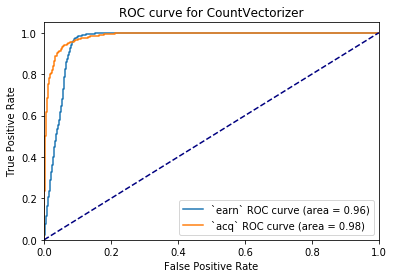

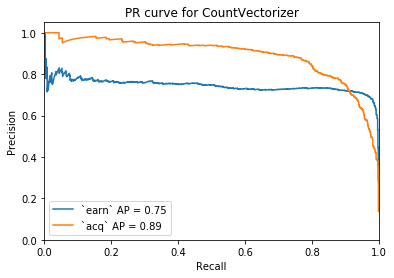

In [73]:
tune_svc(X_count_train,X_count_test,y, 'CountVectorizer')

1.0 linear


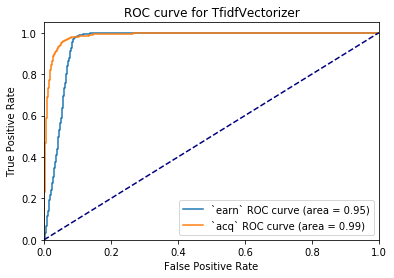

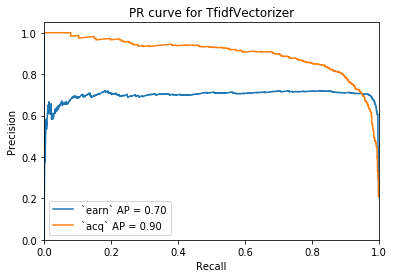

In [74]:
tune_svc(X_tfidf_train,X_tfidf_test,y, 'TfidfVectorizer')